In [4]:
from IPython.display import Video
from IPython.display import HTML
import numpy as np
import cv2

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm
import matplotlib.patches as patches

from tqdm import tqdm

from torchvision.io import read_video
from torchvision.io import write_video
import torchvision.transforms as transforms

In [2]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('circles2.png')
# convert image to numpy array
data = asarray(image)

FileNotFoundError: [Errno 2] No such file or directory: 'circles2.png'

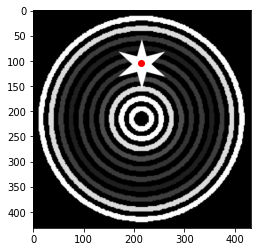

In [62]:
plt.imshow(data[:, :, 0], cmap=cm.Greys_r)
# plt.scatter([214], [214], color="red")
plt.scatter([214], [105], color="red")

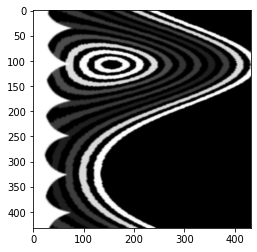

In [65]:
ro,col=data.shape[:2]
cent=(214, 105)
max_radius = 1000
max_radius = int(np.sqrt(ro**2+col**2)/2)

polar=cv2.linearPolar(data[:, :, 0], cent, max_radius, cv2.WARP_FILL_OUTLIERS)
plt.imshow(polar,cmap=cm.Greys_r, interpolation='bicubic')

In [5]:
video_path = "/shared_data/bamc_pnb_data/revised_training_data/Positives/11/3. 11 AC_Video 2.mp4"
video, _, info = read_video(video_path)

In [4]:
def plot_video(video, info):
    
    greyscaler = transforms.Grayscale(num_output_channels=1)
    # print(video.shape)
    video = greyscaler(video.permute(0, 3, 1, 2)).permute(0,2,3,1)

    fig = plt.gcf()
    ax = plt.gca()
    
    DPI = fig.get_dpi()
    fig.set_size_inches(video.shape[2]/float(DPI), video.shape[1]/float(DPI))

    ax.set_title("Video")
    ax.margins(x=0)
    ax.margins(y=0)

    T = video.shape[0]
    # T = 60
    im = ax.imshow(video[0, :, :, 0],
                     cmap=cm.Greys_r)

    def update(i):
        t = i % T
        im.set_data(video[t, :, :, 0])

    return FuncAnimation(plt.gcf(), update, save_count=T, interval=1000/info['video_fps'])

In [5]:
#ani = plot_video(video, info)
#plt.close()
#HTML(ani.to_html5_video())

In [6]:
video[0, :, :, 0].shape

torch.Size([1080, 912])

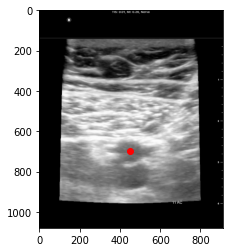

In [7]:
plt.imshow(video[50, :, :, 0], cmap=cm.Greys_r)
# plt.annotate('25, 50', xy=(25, 50), xycoords='data',
#             xytext=(0.5, 0.5), textcoords='figure fraction',
#             arrowprops=dict(arrowstyle="->"))
plt.scatter([450], [700], color="red")

In [8]:
ro,col=video[0, :, :, 0].shape
cent=(450, 700)
#max_radius = 1000
max_radius = int(np.sqrt(ro**2+col**2)/2)

polar=cv2.linearPolar(video[0, :, :, 0].numpy(), cent, max_radius, cv2.WARP_FILL_OUTLIERS)

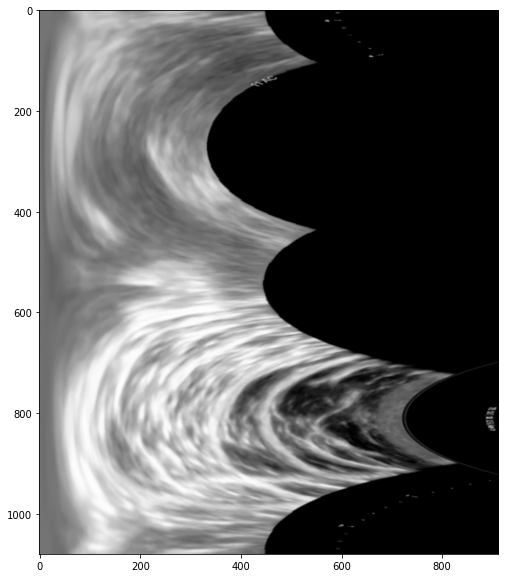

In [9]:
plt.figure(figsize=(16,10))
plt.imshow(polar,cmap=cm.Greys_r, interpolation='bicubic')
plt.show()

In [18]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from yolov4.get_bounding_boxes import YoloModel

yolo_model = YoloModel()

2022-05-23 22:13:28.041482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 22:13:28.055687: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 22:13:28.057542: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-23 22:13:28.063448: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [11]:
def get_bounding_boxes(yolo_model, frame):
    bounding_boxes, classes = yolo_model.get_bounding_boxes(frame.numpy())

In [29]:

def plot_bbox(frame):

    orig_height, orig_width = frame.shape[:-1]

    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(frame[:, :, 0], cmap=cm.Greys_r)

    boxes, classes = yolo_model.get_bounding_boxes(frame.numpy())

    for i, c in enumerate(classes[0]):

        if c == 0.0:
            bb = boxes[0][i]
            # Create a Rectangle patch
            center_x = round((bb[3] + bb[1]) / 2 * orig_width)
            center_y = round((bb[2] + bb[0]) / 2 * orig_height)

            lower_y = round((bb[0] * orig_height))
            upper_y = round((bb[2] * orig_height))
            lower_x = round((bb[1] * orig_width))
            upper_x = round((bb[3] * orig_width))

            width = upper_x - lower_x
            height = upper_y - lower_y

            plt.scatter([center_x], [center_y], color="red")
            rect = patches.Rectangle((lower_x, lower_y), width, height, linewidth=1, edgecolor='r', facecolor='none')

            # Add the patch to the Axes
            ax.add_patch(rect)

torch.Size([1080, 912, 3])


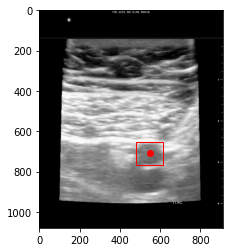

In [32]:
print(video[110].shape)
plot_bbox(video[110])

In [88]:
def get_bbox_centers(frame):
    orig_height, orig_width = frame.shape[:-1]
    boxes, classes = yolo_model.get_bounding_boxes(frame)
    
    pts = []
    for i, c in enumerate(classes[0]):
        if c == 0.0:
            bb = boxes[0][i]
            # Create a Rectangle patch
            center_x = round((bb[3] + bb[1]) / 2 * orig_width)
            center_y = round((bb[2] + bb[0]) / 2 * orig_height)

            pts.append((center_x, center_y))
            break
            
    return pts

def plot_video(video, info):
    
    orig_video = video
    orig_height, orig_width = orig_video.shape[1:-1]
    
    greyscaler = transforms.Grayscale(num_output_channels=1)
    # print(video.shape)
    video = greyscaler(video.permute(0, 3, 1, 2)).permute(0,2,3,1)

    # create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    # fig = plt.gcf()
    # ax = plt.gca()
    
    #DPI = fig.get_dpi()
    #fig.set_size_inches(video.shape[2]/float(DPI), video.shape[1]/float(DPI))

    ax1.set_title("Video 1")
    ax1.margins(x=0)
    ax1.margins(y=0)
    
    ax2.set_title("Video 2")
    ax2.margins(x=0)
    ax2.margins(y=0)

    T = video.shape[0]
    # T = 60
    im1 = ax1.imshow(video[0, :, :, 0],
                     cmap=cm.Greys_r)
    pts = get_bbox_centers(orig_video[0, :, :, :].numpy())
    scat = ax1.scatter([x[0] for x in pts], [x[1] for x in pts], color="red")
    
    ro,col=video[0, :, :, 0].shape
    max_radius = int(np.sqrt(ro**2+col**2)/2)
    im2 = ax2.imshow(np.zeros_like(video[0, :, :, 0]), cmap=cm.Greys_r, interpolation='bicubic')
    
    if len(pts) > 0:
        cent=(pts[0][0], pts[0][1])
        #max_radius = 1000
        
        polar=cv2.linearPolar(video[0, :, :, 0].numpy(), cent, max_radius, cv2.WARP_FILL_OUTLIERS)
        im2 = ax2.imshow(polar, cmap=cm.Greys_r, interpolation='bicubic')

    def update(i):
        t = i % T
        
        im1.set_data(video[t, :, :, 0])
        
        print(orig_video[i, :, :, :].numpy().shape)
        pts = get_bbox_centers(orig_video[i, :, :, :].numpy())
        print(pts)
        if len(pts) > 0:
            scat.set_offsets(pts)
            cent=(pts[0][0], pts[0][1])
            polar=cv2.linearPolar(video[i, :, :, 0].numpy(), cent, max_radius, cv2.WARP_FILL_OUTLIERS)
            im2.set_data(polar)
            # im2.set_data(video[t, :, :, 0])

    return FuncAnimation(fig, update, save_count=T, interval=1000/info['video_fps'])

In [89]:
video[:10].shape

torch.Size([10, 1080, 912, 3])

In [90]:
idx = np.array([i for i in range(video.shape[0]) if i%5==0])
idx[-5:]
#video[idx, :, :, :].shape

array([575, 580, 585, 590, 595])

In [92]:
ani = plot_video(video[idx, :, :, :], info)
plt.close()
HTML(ani.to_html5_video())

(1080, 912, 3)
[(384, 688)]
(1080, 912, 3)
[(384, 688)]
(1080, 912, 3)
[(389, 689)]
(1080, 912, 3)
[(394, 688)]
(1080, 912, 3)
[(399, 690)]
(1080, 912, 3)
[(409, 693)]
(1080, 912, 3)
[(418, 693)]
(1080, 912, 3)
[(428, 692)]
(1080, 912, 3)
[(434, 695)]
(1080, 912, 3)
[(447, 699)]
(1080, 912, 3)
[(446, 699)]
(1080, 912, 3)
[(448, 696)]
(1080, 912, 3)
[(461, 699)]
(1080, 912, 3)
[(464, 703)]
(1080, 912, 3)
[(459, 704)]
(1080, 912, 3)
[(473, 708)]
(1080, 912, 3)
[(486, 709)]
(1080, 912, 3)
[(459, 703)]
(1080, 912, 3)
[(458, 701)]
(1080, 912, 3)
[(484, 698)]
(1080, 912, 3)
[(501, 700)]
(1080, 912, 3)
[(522, 702)]
(1080, 912, 3)
[(544, 707)]
(1080, 912, 3)
[(548, 710)]
(1080, 912, 3)
[(579, 714)]
(1080, 912, 3)
[(582, 714)]
(1080, 912, 3)
[(509, 710)]
(1080, 912, 3)
[(404, 696)]
(1080, 912, 3)
[(377, 689)]
(1080, 912, 3)
[(410, 693)]
(1080, 912, 3)
[(440, 695)]
(1080, 912, 3)
[(448, 699)]
(1080, 912, 3)
[(447, 700)]
(1080, 912, 3)
[(446, 702)]
(1080, 912, 3)
[(437, 710)]
(1080, 912, 3)
[(447